In [1]:
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ShiTomasi corner detection


In [2]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

Initializing random set of colors for visualization purpose 

In [3]:
# Create some random colors
color = np.random.randint(0,255,(100,3))

Capturing the video  

In [4]:
cap = cv2.VideoCapture("slow_traffic_small.mp4")

# Reading Frame by Frame


In [5]:
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

In [6]:
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

# Lukas kennadey parameters 

In [7]:
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Iteration through each frames 

In [8]:
while(1):
    ret,frame = cap.read()
    if(ret==False):
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
   

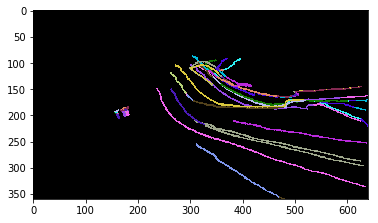

In [9]:

# Visualizing the  cumulative mask . This is the track 
plt.imshow(mask)

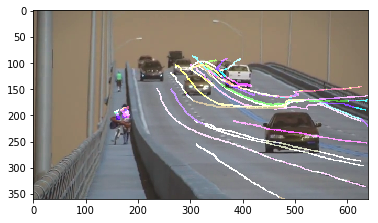

In [10]:
# Track superimposed on the final image frame 
plt.imshow(img)